# Neural Networks

## References

1. Hands-On Machine Learning: Chapter 10 - Introduction to Artificial Neural Networks, Chapter 11 - Training Deep Neural Nets
1. Deep Learning from Scratch
1. Programming PyTorch for Deep Learning
1. Deep Learning with Python
1. Fundamentals of Deep Learning
1. How to build your own neural network from scratch using Python: [https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)
1. Creating a neural network from scratch in Python: [https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/](https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/)
1. How to use data scaling to improve deep learning model stability and performance [https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)
1. Wikipedia: Artificial Neural Network [https://en.wikipedia.org/wiki/Artificial_neural_network](https://en.wikipedia.org/wiki/Artificial_neural_network)

In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from matplotlib import pyplot as plt
from matplotlib import patches
import seaborn as sns
import yellowbrick as yb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Basics of Neural Networks

A **neural network** is made of multiple layers, represented as a graph with nodes and vertices.

## Input Layer

The **input layer** is made of the dataset features.

## Hidden Layers

One or more **hidden layers** are calculated using **activation functions**.

## Output Layer



# Backpropagation

## Softmax

$$
    f_i(\vec{x}) = \frac{e^{x_i}}{\sum_{j=1}^{J}e^{x_j}}
$$

# Activation Functions

In [2]:
X = np.arange(-5, 5.01, 0.01)

In [3]:
def cartesian_plot(x, y):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.arrow(0, -5, 0, 10, color='k', head_width=0.2, head_length=0.2)
    ax.arrow(0, 5, 0, -10, color='k', head_width=0.2, head_length=0.2)
    ax.arrow(-5, 0, 10, 0, color='k', head_width=0.2, head_length=0.2)
    ax.arrow(5, 0, -10, 0, color='k', head_width=0.2, head_length=0.2)
    ax = sns.lineplot(x=x, y=y)
    ax.grid(b=True, linewidth=1)
    ax.autoscale(tight=True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

## Identity

$$
    f(x) = x
$$

### Derivative

$$
    f^\prime(x) = 1
$$

for range $(-\infty,\infty)$ and order of continuity $C^\infty$

In [4]:
y = X

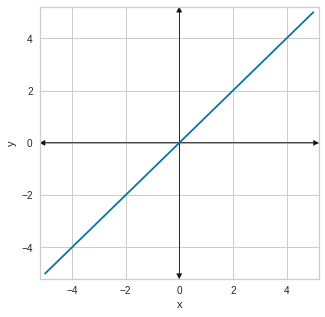

In [5]:
cartesian_plot(X, y)

## Binary Step


$$
    f(x) = \begin{cases}
    0 & \text{if } x < 0\\
    1 & \text{if } x \geq 0
    \end{cases}
$$

### Derivative

$$
    f^\prime(x) = \begin{cases}
    0 & \text{if } x \neq 0\\
    undefined & \text{if } x = 0
    \end{cases}
$$

for range $\{0,1\}$ and order of continuity $C^{-1}$

In [6]:
y = [0 if x < 0 else 1 for x in X]

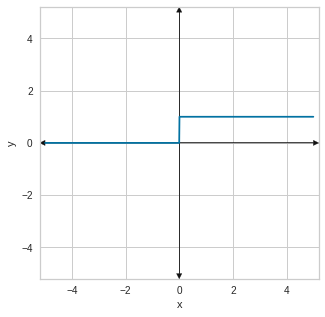

In [7]:
cartesian_plot(X, y)

## Logistic/Sigmoid Function

$$
    f(x) = \frac{1}{1 + e^{-x}}
$$

### Derivative

$$
    f^\prime(x) = f(x)(1 - f(x))
$$

for range $(0,1)$ and order of continuity $C^\infty$

In [8]:
y = 1 / (1 + np.exp(-X))

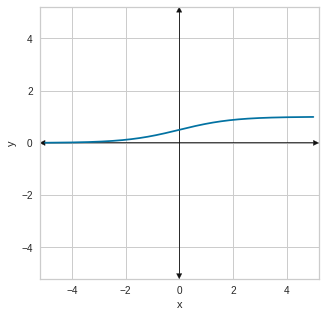

In [9]:
cartesian_plot(X, y)

## Hyperbolic Tangent: $tanh(x)$
$$
    \cosh(x) = \frac{e^x - e^{-x}}{2}
$$

$$
    \sinh(x) = \frac{e^x + e^{-x}}{2}
$$

$$
    f(x) = \tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

for range $(-1, 1)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(x) = 1 - f(x)^2
$$

In [10]:
y = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

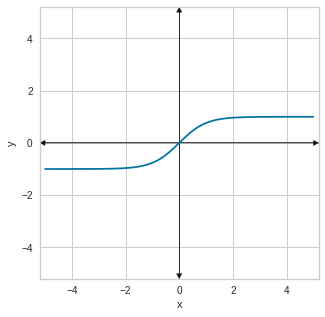

In [11]:
cartesian_plot(X, y)

## Rectified Linear Unit (ReLU)

$$
    f(x) = \begin{cases}
    0 & \text{if } x \leq 0\\
    x & \text{if } x > 0\\
    = \max\{0,x\} = x1_{x>0}
    \end{cases}
$$

for range $[0, \infty)$ and order of continuity $C^0$

### Derivative

$$
    f^\prime(x) = \begin{cases}
    0 & \text{if } x < 0\\
    1 & \text{if } x > 0\\
    undefined & \text{if } x = 0
    \end{cases}
$$

In [12]:
y = [0 if x < 0 else x for x in X]

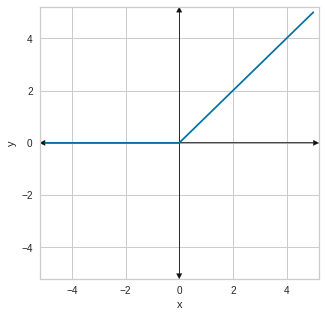

In [13]:
cartesian_plot(X, y)

## Gaussian Error Linear Unit (GELU)

$$
    f(x) = \frac{1}{2}x\left(1 + \text{erf} \left(\frac{x}{\sqrt{2}}\right)\right) = x\Phi(x)
$$

for range $(-0.17\ldots, \infty)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(x) = \Phi(x) + x\phi(x)
$$

In [14]:
y = 0.5 * X * (1 + erf(X / np.sqrt(2)))

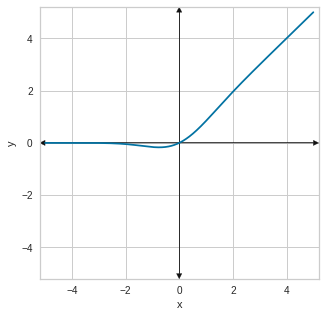

In [15]:
cartesian_plot(X, y)

## Softplus

$$
    f(x) = \ln(1 + e^x)
$$

for range $(0, \infty)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(x) = \frac{1}{1 + e^{-x}}
$$

In [16]:
y = np.log(1 + np.exp(X))

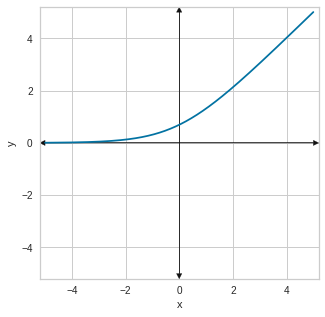

In [17]:
cartesian_plot(X, y)

## Exponential Linear Unit (ELU)

$$
    f(x) = \begin{cases}
    \alpha(e^x -1) & \text{if } x \leq 0\\
    x & \text{if } x > 0
    \end{cases}\\
    \text{with parameter } \alpha
$$

for range $(-\alpha, \infty)$ and order of continuity $\begin{cases}C^1 & \text{if } \alpha=1\\C^0 & otherwise\end{cases}$

### Derivative

$$
    f^\prime(x) = \begin{cases}
    \alpha e^x & \text{if } x < 0\\
    1 & \text{if } x \geq 0\\
    1 & \text{if } x = 0 \text{ and }\alpha = 1
    \end{cases}
$$

In [18]:
a = 2
y = [x if x > 0 else a * (np.exp(x) - 1) for x in X]

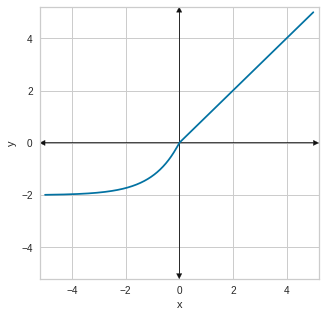

In [19]:
cartesian_plot(X, y)

## Scaled Exponential Linear Unit (SELU)

$$
    f(x) = \lambda\begin{cases}
    \alpha(e^x -1) & \text{if } x < 0\\
    x & \text{if } x \geq 0
    \end{cases}\\
$$

with parameters $\lambda = 1.0507$ and $\alpha = 1.67326$

for range $(-\lambda\alpha,\infty)$ and order of continuity $C^0$

### Derivative

$$
    f^\prime(x) = \lambda\begin{cases}
    \alpha e^x & \text{if } x < 0\\
    1 & \text{if } x \geq 0
    \end{cases}
$$

In [20]:
l = 1.0507
a = 1.67326
y = [x * l if x >= 0 else l * a * (np.exp(x) - 1) for x in X]

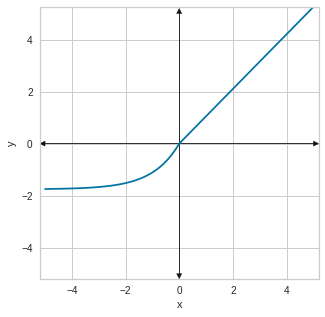

In [21]:
cartesian_plot(X, y)

## Leaky Rectified Linear Unit (Leaky ReLU)

$$
    f(x) = \begin{cases}
    0.01x & \text{if } x < 0\\
    x & \text{if } x \geq 0
    \end{cases}
$$

for range $(-\infty,\infty)$ and order of continuity $C^0$

### Derivative

$$
    f^\prime(x) = \begin{cases}
    0.01 & \text{if } x < 0\\
    1 & \text{if } x \geq 0
    \end{cases}
$$

In [22]:
y = [0.01 * x if x < 0 else x for x in X]

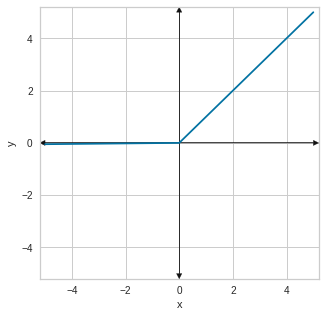

In [23]:
cartesian_plot(X, y)

## Parametric Rectified Linear Unit (PReLU)

$$
    f(x) = \begin{cases}
    \alpha x & \text{if } x < 0\\
    x & \text{if } x \geq 0
    \end{cases}\\
    \text{with parameter } \alpha
$$

for range $(-\infty,\infty)$ and order of continuity $C^0$

### Derivative

$$
    f^\prime(x) = \begin{cases}
    \alpha & \text{if } x < 0\\
    1 & \text{if } x \geq 0
    \end{cases}
$$

In [24]:
a = 0.25
y = [a * x if x < 0 else x for x in X]

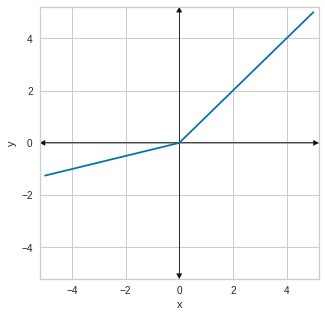

In [25]:
cartesian_plot(X, y)

## Sigmoid Linear Unit (SiLU), Sigmoid Shrinkage, SiL, Swish-1

$$
    f(x) = \frac{x}{1 + e^{-x}}
$$

for range $[-0.278\ldots,\infty)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(x) = \frac{1 = e^{-x} + xe^{-x}}{(1 + e^{-x})^2}
$$

In [26]:
y = X / (1 + np.exp(-X))

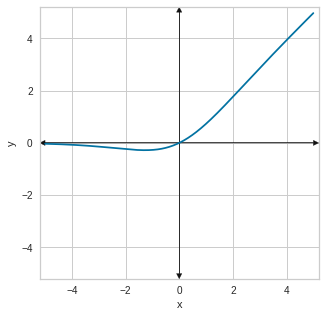

In [27]:
cartesian_plot(X, y)

## Mish

$$
    f(x) = x\tanh(\ln(1 + e^x))
$$

for range $[-0.308\ldots,\infty)$ and order of continuity $C^\infty$

### Derivative

$$
    f^\prime(x) = \frac{(e^x(4e^{2x} + e^{3x} + 4(1 + x) + e^x(6 + 4x)))}{(2 + 2e^x + e^{2x})^2}
$$

In [28]:
y = X * np.tanh(np.log(1 + np.exp(X)))

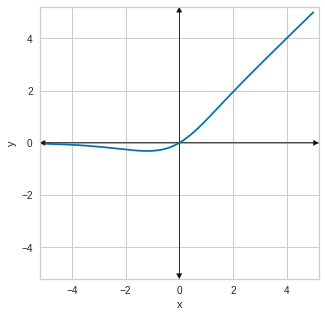

In [29]:
cartesian_plot(X, y)

## Gaussian

$$
    f(x) = e^{-x^2}
$$

for range $(0,1]$ and order of continuity $C^\infty$

## Derivative

$$
    f^\prime(x) = -2xe^{-x^2}
$$

In [30]:
y = np.exp(-np.square(X))

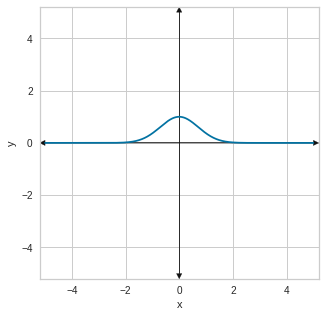

In [31]:
cartesian_plot(X, y)